Total de amostras: 13
Média Geral: 812.26
--------------------------------------------------


C:\Users\jonathasmarques\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



--- ANÁLISE DOS NOVOS SEGMENTOS (Pós-Atualização) ---
                         count      min      max     mean   median    std
Nome_Grupo                                                               
Grupo 1 (Entrada)            7   523.74   740.76   633.92   629.48  70.18
Grupo 2 (Intermediário)      4   924.40   987.41   943.26   930.60  29.66
Grupo 3 (Premium)            2  1105.00  1244.00  1174.50  1174.50  98.29


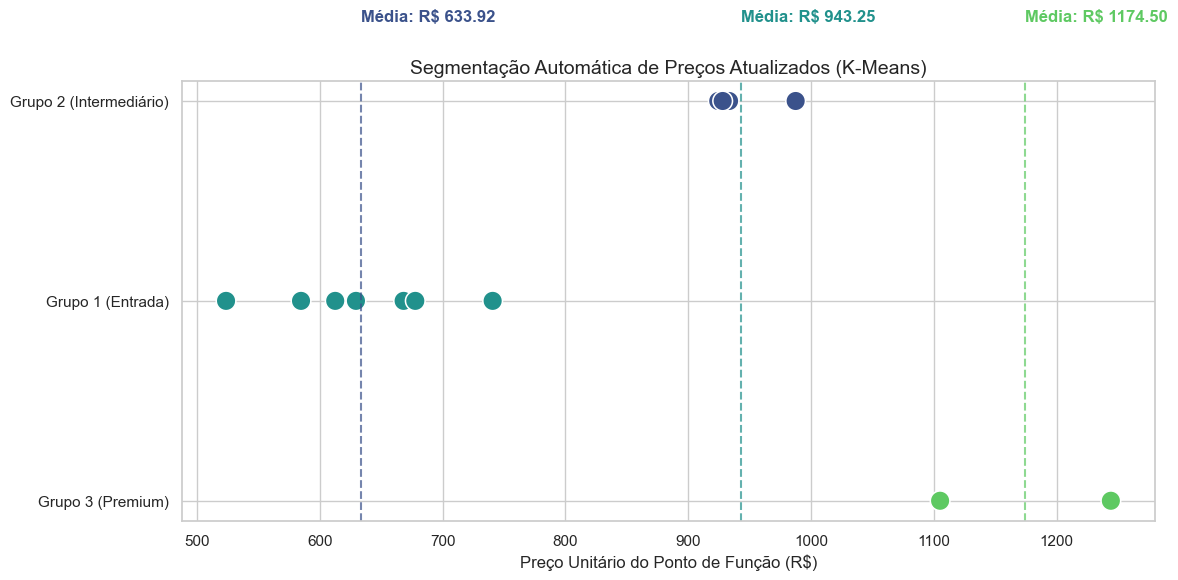


DETALHAMENTO DOS ITENS POR GRUPO

Grupo 1 (Entrada)
Valores: [523.74 584.76 612.6  629.48 668.29 677.78 740.76]
Preço de Referência Sugerido (Média): R$ 633.92

Grupo 2 (Intermediário)
Valores: [924.4  928.01 933.2  987.41]
Preço de Referência Sugerido (Média): R$ 943.25

Grupo 3 (Premium)
Valores: [1105. 1244.]
Preço de Referência Sugerido (Média): R$ 1174.50


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Configuração visual
sns.set_theme(style="whitegrid")

# ==============================================================================
# 1. CARREGAMENTO DOS DADOS ATUALIZADOS (IPCA)
# ==============================================================================
# Lista extraída do seu notebook (valores já atualizados)
lista_precos_atualizados = [
    987.41, 584.76, 612.60, 668.29, 629.48, 933.20, 
    924.40, 740.76, 928.01, 523.74, 1105.00, 1244.00, 677.78
]

df = pd.DataFrame(lista_precos_atualizados, columns=['Preco'])

print(f"Total de amostras: {len(df)}")
print(f"Média Geral: {df['Preco'].mean():.2f}")
print("-" * 50)

# ==============================================================================
# 2. ALGORITMO DE CLUSTERIZAÇÃO (K-MEANS)
# ==============================================================================
# Vamos pedir ao computador para encontrar 3 grupos naturais (Baixo, Médio, Alto)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Preco']])

# Ordenando os clusters para garantir que 0 seja o mais barato e 2 o mais caro
mapping = {
    df.groupby('Cluster')['Preco'].mean().sort_values().index[0]: 'Grupo 1 (Entrada)',
    df.groupby('Cluster')['Preco'].mean().sort_values().index[1]: 'Grupo 2 (Intermediário)',
    df.groupby('Cluster')['Preco'].mean().sort_values().index[2]: 'Grupo 3 (Premium)'
}
df['Nome_Grupo'] = df['Cluster'].map(mapping)

# Ordenando o dataframe pelo preço para facilitar visualização
df_sorted = df.sort_values(by='Preco')

# ==============================================================================
# 3. ANÁLISE ESTATÍSTICA POR GRUPO
# ==============================================================================
resumo_grupos = df.groupby('Nome_Grupo')['Preco'].agg(
    ['count', 'min', 'max', 'mean', 'median', 'std']
).sort_values(by='mean')

print("\n--- ANÁLISE DOS NOVOS SEGMENTOS (Pós-Atualização) ---")
print(resumo_grupos.round(2))

# ==============================================================================
# 4. VISUALIZAÇÃO DOS GRUPOS
# ==============================================================================
plt.figure(figsize=(12, 6))

# Plot de dispersão (cada ponto é um contrato)
sns.scatterplot(data=df, x='Preco', y='Nome_Grupo', hue='Nome_Grupo', s=200, palette='viridis', legend=False)

# Adicionando linhas verticais para as médias de cada grupo
cores = sns.color_palette('viridis', 3)
medias = resumo_grupos['mean'].values
nomes = resumo_grupos.index

for i, media in enumerate(medias):
    plt.axvline(media, color=cores[i], linestyle='--', alpha=0.7)
    plt.text(media, -0.4, f'Média: R$ {media:.2f}', color=cores[i], fontweight='bold')

plt.title('Segmentação Automática de Preços Atualizados (K-Means)', fontsize=14)
plt.xlabel('Preço Unitário do Ponto de Função (R$)')
plt.ylabel('')
plt.yticks(fontsize=11)

# Salvando
plt.tight_layout()
plt.savefig('6_segmentacao_clusters.png')
plt.show()

# ==============================================================================
# 5. RESULTADO DETALHADO
# ==============================================================================
print("\n" + "="*50)
print("DETALHAMENTO DOS ITENS POR GRUPO")
print("="*50)
for grupo in nomes:
    itens = df_sorted[df_sorted['Nome_Grupo'] == grupo]['Preco'].values
    media = itens.mean()
    print(f"\n{grupo}")
    print(f"Valores: {itens}")
    print(f"Preço de Referência Sugerido (Média): R$ {media:.2f}")